In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 12 17:14:47 2021

@author: Fikrah Elhifzi Harahap
@instagram: fikrahelhifzi
@linkedin: https://www.linkedin.com/in/fikrah-elhifzi-harahap-68583489/
"""

In [1]:
import numpy as np
import pandas as pd
import math
import datetime

almanac_file1 = 'almanac.yuma.week0131.319488.txt'
from read_almanac_satellite import *

nav = read_yuma(almanac_file1)
nav

# inclination sohoul be in same with latitu
# Every sataelite has differenct asscending node
# 2019 April for the week. it would be continue 1023 or 1024. so it will be started from zero again
# because we have only have 10 bits == [0 - 1023] --> [0-1023]. It is started in 1980

,ID,Health,Eccentricity,Time of Applicability(s),Orbital Inclination(rad),Rate of Right Ascen(r/s),SQRT(A) (m 1/2),Right Ascen at Week(rad),Argument of Perigee(rad),Mean Anom(rad),Af0(s),Af1(s/s),week
0,1.0,0.0,0.0110673904400,319488.0,0.9859865246,-0.00000000787461,5153.63085899999987,0.3415586490,0.889881505,-0.9775165238,0.00054073333740,-0.00000000001091,131.0
1,2.0,0.0,0.0203409194900,319488.0,0.9644988093,-0.00000000805748,5153.72656199999983,0.2549198185,-1.488152363,-0.7331832700,-0.00063705444340,0.00000000000000,131.0
2,3.0,0.0,0.0038800239560,319488.0,0.9706347325,-0.00000000781747,5153.70800799999961,1.3777607990,0.998544719,-2.1284477780,-0.00032329559330,-0.00000000001455,131.0
3,4.0,0.0,0.0014505386350,319488.0,0.9608735813,-0.00000000773747,5153.63623000000007,2.4590936670,-3.101498306,0.8389331941,-0.00020408630370,0.00000000000000,131.0
4,5.0,0.0,0.0060544013980,319488.0,0.9576258564,-0.00000000796605,5153.55029300000024,1.3390277840,1.008681875,1.6388330190,-0.00005722045898,0.00000000000000,131.0
5,6.0,0.0,0.0022454261780,319488.0,0.9854052897,-0.00000000788604,5153.54931599999964,0.3333056376,-1.032652947,-0.6041405068,0.00009346008301,0.00000000000728,131.0
6,7.0,0.0,0.0152802467300,319488.0,0.9516337439,-0.00000000795462,5153.67187500000000,-2.8042584440,-2.303871364,-1.6021845100,0.00026226043700,0.00000000000728,131.0
7,8.0,0.0,0.0065989494320,319488.0,0.9660627507,-0.00000000787461,5153.62060500000007,-0.7352561664,0.053727902,1.3580239040,-0.00004005432129,0.00000000000000,131.0
8,9.0,0.0,0.0022644996640,319488.0,0.9537609438,-0.00000000780604,5153.64062500000000,2.4071487930,1.818902364,1.6830851440,-0.00036144256590,0.00000000000000,131.0
9,10.0,0.0,0.0070543289180,319488.0,0.9704909218,-0.00000000784033,5153.62988299999961,1.3749295260,-2.584751635,-2.9321290000,-0.00022315979000,-0.00000000000728,131.0


In [62]:
day_in_15_minutes = 24 * 60
minutes = 15

def date2gpstime(date1):
    # datetime.date.toordinal is the function to count from the date since the first day in 1980
    dif_of_days = datetime.date.toordinal(datetime.date(date1[0],date1[1],date1[2])) - datetime.date.toordinal(datetime.date(2019,4,7))
    
    '''here, we are substract by datetime.date(2019,4,7) as gps week number rollover which the current is April 6 to 7, 2019.
    it is started at August 21 to 22, 1999 and it will count until 1024 weeks, which is about 19.6 years, after that
    it will recount back to zero again.
    Therefore in dif_of_days, we are trying to get the days that we want since the current gps week number rollover
    '''

    # After that, we are trying to get 
    weeks = dif_of_days // 7
    day_of_week = dif_of_days - weeks*7
    
    res_tow = []
    
    for i in range(0,day_in_15_minutes,minutes ):
        tow = day_of_week*86400 + date1[3]*3600 + i*60  + date1[5]
        res_tow.append(tow)
    return [weeks,res_tow]
  
t = np.array(date2gpstime([2021,10,10,0,0,0])[1])
weeks = np.array(date2gpstime([2021,10,10,0,0,0])[0])
t

array([    0,   900,  1800,  2700,  3600,  4500,  5400,  6300,  7200,
        8100,  9000,  9900, 10800, 11700, 12600, 13500, 14400, 15300,
       16200, 17100, 18000, 18900, 19800, 20700, 21600, 22500, 23400,
       24300, 25200, 26100, 27000, 27900, 28800, 29700, 30600, 31500,
       32400, 33300, 34200, 35100, 36000, 36900, 37800, 38700, 39600,
       40500, 41400, 42300, 43200, 44100, 45000, 45900, 46800, 47700,
       48600, 49500, 50400, 51300, 52200, 53100, 54000, 54900, 55800,
       56700, 57600, 58500, 59400, 60300, 61200, 62100, 63000, 63900,
       64800, 65700, 66600, 67500, 68400, 69300, 70200, 71100, 72000,
       72900, 73800, 74700, 75600, 76500, 77400, 78300, 79200, 80100,
       81000, 81900, 82800, 83700, 84600, 85500])

In [3]:
day_in_15_minutes = 24 * 60
# µ is equal with MU
# ωE is equal with omge

MU = np.array(3.986004415e14)  # Product of the mass of the earth where gravitation is constant
omge  = np.array(7.2921151467e-5)    # Spead of the rotation of the earth or angular velocity
def satpos_alm(weeks,tow,number_satellite):
    nav1sat = nav.loc[number_satellite]
    toa = np.array(nav1sat[3]) # it is the number of seconds in the orbit when the almanac was generated. Kind of a time tag.
    gps_week = np.array(nav1sat[-1])  
    A = np.array(nav1sat[6]**2) # semi major axis 
    M = np.array(nav1sat[9]) # mean anomali for the reference of epoch

    '''
    e or Eccentricity is value to define how eleptical it is. if the Eccentricity is small or near zero, it is circle,
    however if it is large number near to 1, it becomes more eleptical and its very orbit and its very elongated 
    '''
    e = np.array(nav1sat[2])
    omg = np.array(nav1sat[8]) # remain of peregee
    OMG = np.array(nav1sat[7]) # Longitude of ascending node
    OMG_dot = np.array(nav1sat[5])


    #Calculation
    #The time elapsed since the reference epoch [seconds]
    tk = (t+(weeks*7*day_in_15_minutes)) - (toa + (gps_week*7*day_in_15_minutes))

    #Calculating the mean angular velocity n, named as a mean motion, on the basis of Kepler’s Second Law
    n = math.sqrt(MU/(A**3))

    # Computation of the mean anomaly at the epoch of interest tk:
    Mk = M + (n*tk)

    '''
    Calculation of the eccentric anomaly (Kepler’s equation)
    Ek = Mk + e sin(Ek)
    The equation must be solved in iterative manner: (for i=1,2,3...)
    E1 = Mk
    Ei+1 = Mk + e sin(Ei)
    The stop criterion for an iterative solution is: |E− E1| < 10−12
    (1e − 12 = 10−12)
    '''
    res_Ek = []
    for i in range(len(Mk)):
        n = i
        Ek = Mk[i]
        while True:
            Ek_prev = Ek
            Ek = Mk[i] + e*np.sin(Ek_prev)
            if abs(Ek_prev-Ek) < 1e-12 :
                res_Ek.append(Ek)
                break
    res_Ek = np.array(res_Ek)

    #Calculation of the true anomaly
    vk = np.arctan2(np.sqrt(1-(e**2))*np.sin(res_Ek),((np.cos(res_Ek))-e))  

    #fik is equal with Φk 
    #Calculation of the argument of latitude
    fik = vk + omg 

    #Calculation of the orbit radius
    rk = A *(1 - e*(np.cos(res_Ek)))

    #Computation of the orbital coordinates
    xk = rk * np.cos(fik)
    yk = rk * np.sin(fik)


    #Correction of the longitude of the ascending node
    #Ωk is equal with OMGK 

    OMGk = OMG + ((OMG_dot- omge)*tk) - omge * toa
    i = np.array(nav1sat[4]) 

    #Calculation of the ECEF coordinates of the satellite
    Xk = xk * np.cos(OMGk) - (yk* (np.cos(i) * np.sin(OMGk )))
    Yk = xk * np.sin(OMGk) + (yk*np.cos(i) * np.cos(OMGk))
    Zk = yk * np.sin(i)
    coordinate_satellite = np.array([Xk,Yk,Zk])
    coordinate_satellite = coordinate_satellite.T
    df_coordinate_satellite = pd.DataFrame(coordinate_satellite, list(range(0,day_in_15_minutes,15)) ,['x','y','z'])
    return(df_coordinate_satellite,coordinate_satellite)

    
satellite_coordinate = satpos_alm(weeks,t,0)[0]
display(satellite_coordinate)


,x,y,z
0,-2.06262106375063e+07,-1.41776498216809e+07,-9.64999769340178e+06
15,-1.94462369418316e+07,-1.39354701354766e+07,-1.21647813513267e+07
30,-1.79933463290076e+07,-1.36935845701380e+07,-1.44766938127240e+07
45,-1.62883949428514e+07,-1.34897414850808e+07,-1.65474312162030e+07
60,-1.43598660554423e+07,-1.33578451248586e+07,-1.83426364867964e+07
...,...,...,...
1365,-2.23714114111768e+07,-1.41139169736445e+07,3.65253287400609e+06
1380,-2.25075696451546e+07,-1.44063896675169e+07,7.81977379495920e+05
1395,-2.23867231346473e+07,-1.45164422712319e+07,-2.10180055817799e+06
1410,-2.19899109345544e+07,-1.44785191907655e+07,-4.95025511845695e+06


In [4]:
# In this case, I take location from the indonesia national monument in the capital city of Indonesia, which is Jakarta 
# ϕ or phi is latitude
# λ is langitude

lat = 52
long = 21
h = 100 # it is in meter

def xyz_receiver(lat,long,h):
    a = 6378137  # it is in meter
    e_2 = 0.00669438002290
    
    '''
    Caluclate N. N is the radius of curvature of the ellipsoid in the direction perpendicular to the elliptical meridian 
    plane (prime vertical)
    '''
    
    N = a / np.sqrt(1 - (e_2*(np.sin(np.deg2rad(lat))**2)))

    # Transformation of the receiver ϕ(lat), λ(long), h(elevation) coordinates to XYZ
    
    X = (N+h) * (np.cos(np.deg2rad(lat)) * np.cos(np.deg2rad(long)))
    Y = (N+h) * (np.cos(np.deg2rad(lat)) * np.sin(np.deg2rad(long)))
    Z = ((N*(1-e_2))+h) * np.sin(np.deg2rad(lat))
    receiver = np.array([X,Y,Z])
    return receiver.tolist()


coordinate_receiver = xyz_receiver(lat,long,h)
coordinate_receiver

[3673659.54771625, 1410185.7773327404, 5002882.146444102]

In [5]:
X = coordinate_receiver[0]
Y = coordinate_receiver[1]
Z = coordinate_receiver[2]


def sat_rec_vector(X,Y,Z, one_satellite):
    data = []
    data.insert(0, {'x': coordinate_receiver[0], 'y': coordinate_receiver[1], 'z': coordinate_receiver[2]})
    
    satellite_coordinate = satpos_alm(weeks,t,one_satellite)[0]
    
    # Here, I just concanete coordinate_receiver and all coordinate_satellite. Just to see the view
    sat_rec_coordinate = pd.concat([pd.DataFrame(data,index = ['coor_rec']), satellite_coordinate])
    #display('This is BEFORE Determination of the satellite-receiver vector',sat_rec_coordinate)
    

    # Transform from pandas to numpy and then from numpy to list
    data = sat_rec_coordinate.to_numpy()
    data = data.tolist()
    res_data = [data[0]]
    for i in range(len(data)):
        x = data[i+1][0] - data[0][0]
        y = data[i+1][1] - data[0][1]
        z = data[i+1][2] - data[0][2]
        res_data.append([x,y,z])
        if i == 95:
            break
    res_data = np.array(res_data)
    df_res_data = pd.DataFrame(res_data, np.append('coor_rec', np.arange(0,day_in_15_minutes,15)),['x','y','z'])
    #display('This is AFTER Determination of the satellite-receiver vector', df_res_data)
    return res_data

sat_rec_coordinate = sat_rec_vector(X,Y,Z,0)
sat_rec_coordinate

array([[  3673659.54771625,   1410185.77733274,   5002882.1464441 ],
       [-24299870.18522251, -15587835.59901363, -14652879.83984588],
       [-23119896.48954788, -15345655.9128093 , -17167663.49777079],
       [-21667005.87672389, -15103770.34747077, -19479575.95916815],
       [-19962054.49056769, -14899927.26241352, -21550313.36264708],
       [-18033525.60315857, -14768030.90219137, -23345518.63324047],
       [-15916620.4986582 , -14736783.88393932, -24835289.03216428],
       [-13652115.91423092, -14828527.3394361 , -25994625.63215768],
       [-11285026.34938082, -15058318.58625044, -26803821.0543024 ],
       [ -8863115.71132199, -15433278.92850147, -27248781.52580456],
       [ -6435307.82449714, -15952235.99322752, -27321278.94837592],
       [ -4050049.1757789 , -16605676.0007739 , -27019128.27979606],
       [ -1753679.75953059, -17376011.67052097, -26346285.21020835],
       [   411131.11552693, -18238161.22893639, -25312858.94745735],
       [  2406827.84082535, -19160

In [6]:
# ϕ or phi is latitude
# λ is langitude

lat = np.array(52) 
long = np.array(21)
h = np.array(100) # it is in meter
lat = np.deg2rad(lat)
long = np.deg2rad(long)



# Rotation to the horizontal coordinate system neu

Rneu = np.array([[-np.sin(lat)*np.cos(long), -np.sin(long) , np.cos(lat)*np.cos(long) ],
                 [-np.sin(lat)*np.sin(long),  np.cos(long) , np.cos(lat)*np.sin(long) ],
                 [ np.cos(lat), 0 , np.sin(lat)]])

Rneu_Transpose = Rneu.T
display(Rneu)

array([[-0.73567142, -0.35836795,  0.5747695 ],
       [-0.2823978 ,  0.93358043,  0.22063334],
       [ 0.61566148,  0.        ,  0.78801075]])

In [7]:
def n_e_u (satellite):
    sat_rec_coordinate = sat_rec_vector(X,Y,Z,satellite)
    sat_rec_coordinate_all_epoch = np.matrix(sat_rec_coordinate[1:])
    sat_rec_coordinate_all_epoch = sat_rec_coordinate_all_epoch.T

    X_all_sat_rec_neu = np.matmul(Rneu_Transpose ,sat_rec_coordinate_all_epoch)
    res_X_all_sat_rec_neu = X_all_sat_rec_neu.T
    res_X_all_sat_rec_neu = np.array(res_X_all_sat_rec_neu)

    df_ECEF_neu_satellite_receiver = pd.DataFrame(res_X_all_sat_rec_neu, list(range(0,day_in_15_minutes,15)) ,['n','e','u'])
    return res_X_all_sat_rec_neu
    
    
n_e_u (0)

array([[ 13257476.72270455,  -5844203.55420025, -28952647.42723064],
       [ 10772757.37676486,  -6040974.09330095, -30202678.18521835],
       [  8212243.8953294 ,  -6335823.89388004, -31136044.83086268],
       [  5625521.81263192,  -6756519.911925  , -31742879.53153047],
       [  3064272.26922587,  -7324506.99471506, -32019960.26554774],
       [   580907.36380719,  -8053966.33177033, -31970288.73208317],
       [ -1772874.6608197 ,  -8951142.09073848, -31602531.93110425],
       [ -3947572.69678475, -10013959.73469014, -30930355.34386735],
       [ -5897360.16930778, -11231950.52027148, -29971677.36016577],
       [ -7581510.571624  , -12586487.21238349, -28747875.40774948],
       [ -8965724.63227083, -14051326.26439533, -27282974.15603342],
       [-10023313.31735292, -15593441.76660325, -25602845.20643049],
       [-10736192.92355905, -17174126.55350082, -23734445.86530647],
       [-11095652.02597964, -18750326.2163067 , -21705121.95043104],
       [-11102855.09466191, -20276

In [8]:
total_sat = len(nav)

def azimuth_elevation(total_satellite):
    res_azimuth = []
    res_elevation = []
    for i in range(total_satellite):
        satellite = n_e_u(i)
        for i in satellite:
            azimuth = np.arctan2(i[1],i[0])
            array_azimuth_angle = np.rad2deg(azimuth)
            res_azimuth.append(array_azimuth_angle)
            numerator = i[2]
            denominator = np.sqrt((i[0]**2)+(i[1]**2)+(i[2]**2))
            elevation_angle = np.arcsin(numerator/denominator)
            array_elevation_angle = np.rad2deg(elevation_angle)
            res_elevation.append(array_elevation_angle)
                      
    res_azimuth = np.array(res_azimuth).reshape(len(nav),int(len(res_azimuth)/len(nav)))
    res_elevation = np.array(res_elevation).reshape(len(nav),int(len(res_elevation)/len(nav)))
    
    return (res_azimuth,res_elevation )
        
azimuth_elevation(total_sat)

(array([[ -23.78899903,  -29.28213744,  -37.65052621, ...,  -15.99095277,
          -18.10530721,  -20.96215442],
        [  56.47989091,   52.19464105,   49.25491792, ...,   76.25809258,
           67.66420137,   60.61120983],
        [ -32.40425772,  -35.82949229,  -39.12663385, ...,  -21.69858212,
          -25.89231533,  -29.74765759],
        ...,
        [  60.21701714,   50.69611387,   43.29313807, ...,   93.22258466,
           80.89009855,   68.41218963],
        [ -71.01326748,  -80.36972759,  -90.56737578, ...,  -53.70943512,
          -58.58994909,  -65.1672835 ],
        [-119.173195  , -123.14204807, -127.11146066, ..., -107.37632298,
         -111.95572384, -116.20042679]]),
 array([[-63.41574215, -67.75861962, -71.57570007, ..., -50.19988898,
         -55.20355111, -60.04103177],
        [ 38.06986487,  33.25796585,  28.02729365, ...,  46.97012419,
          44.6875754 ,  41.20836829],
        [-17.23795637, -21.81854228, -26.51003844, ...,  -5.99672323,
          -9.82

In [9]:
def satellite_coordinate_one_epoch (one_epoch):
    res = []
    mask = 10
    one_epoch_every_satellite = []
    one_elevation_angle = []
    coordinate_receiver_x = coordinate_receiver[0]
    coordinate_receiver_y = coordinate_receiver[1]
    coordinate_receiver_z = coordinate_receiver[2]
    for i in range(len(nav)):
        satellite_coordinate_1 = satpos_alm(weeks,t,i)[1]
        one_epoch_every_satellite.append(satellite_coordinate_1[one_epoch])
    one_epoch_every_satellite = np.array(one_epoch_every_satellite)
    result_all_elevation = azimuth_elevation(total_sat)[1].T
    result_all_elevation = result_all_elevation[one_epoch]
    result_all_elevation = np.expand_dims(result_all_elevation,axis = 0)
    result_all_elevation = result_all_elevation.T
    one_epoch_cordinate_and_elevation = np.concatenate ((one_epoch_every_satellite,result_all_elevation),axis = 1)
    for i in one_epoch_cordinate_and_elevation:
        if i[3] > mask:
            p1 = (i[0]-coordinate_receiver_x)**2
            p2 = (i[1]-coordinate_receiver_y)**2
            p3 = (i[2]-coordinate_receiver_z)**2
            p = np.sqrt(p1+p2+p3)         
            Ax = -(i[0]-coordinate_receiver_x)/p
            Ay = -(i[1]-coordinate_receiver_y)/p
            Az = -(i[2]-coordinate_receiver_z)/p
            A  = np.array([Ax,Ay,Az,np.array(1)]) 
            res.append(A)
            
    res = np.array(res)
    res_transpose = res.T
    c = np.linalg.inv(np.matmul(res_transpose,res))
    qx = c[0][0]
    qy = c[1][1]
    qz = c[2][2]
    qt = c[3][3]
    gdop = c[0][0]
    gdop1 = np.sqrt((qx+qy+qz+qt))
    pdop = np.sqrt((qx+qy+qz))
    tdop = np.sqrt(qt)
    Qxyz = c[:3,:3]
    Qneu = np.matmul(Rneu_Transpose,Qxyz)
    Qneu_new = np.matmul(Qneu,Rneu)
    qn = Qneu_new[0][0]
    qe = Qneu_new[1][1]
    qu = Qneu_new[2][2]
    hdop = np.sqrt(qn+qe)
    vdop = np.sqrt(qu)
    PDOPneu = np.sqrt(qn+qe+qu)
    
    
    return np.array([gdop1,pdop, tdop,hdop,vdop,PDOPneu])

satellite_coordinate_one_epoch (0) 

array([2.60887395, 2.30047436, 1.23046373, 1.54476852, 1.70466199,
       2.30047436])

In [10]:
t = np.array(date2gpstime([2021,10,10,0,0,0])[1])
total_minutes = len(t)

def all_satellite_coordinate(tot_minutes):
    result = []
    for i in range(tot_minutes):
        data = satellite_coordinate_one_epoch (i) 
        result.append(data)
    array_result = np.array(result)
    
    df_dop_result = pd.DataFrame(result,list(range(0,day_in_15_minutes,15)) ,['gdop','pdop','tdop','hdop','vdop','PDOPneu'])
    return array_result, df_dop_result
    
all_satellite_coordinate(total_minutes)    

(array([[2.60887395, 2.30047436, 1.23046373, 1.54476852, 1.70466199,
         2.30047436],
        [1.75857701, 1.56813232, 0.79596113, 0.87243383, 1.30303422,
         1.56813232],
        [1.9745912 , 1.74501246, 0.92408978, 0.86837881, 1.51360058,
         1.74501246],
        [2.17783341, 1.9164453 , 1.03450268, 0.89194078, 1.69623237,
         1.9164453 ],
        [2.19762472, 1.93618547, 1.03958658, 0.9225978 , 1.70224189,
         1.93618547],
        [2.72797837, 2.3747328 , 1.34257591, 1.08295197, 2.11342635,
         2.3747328 ],
        [2.34625505, 2.06497541, 1.11390723, 0.96242167, 1.8269833 ,
         2.06497541],
        [2.18973386, 1.92804532, 1.0380634 , 0.92923167, 1.68934522,
         1.92804532],
        [1.97405769, 1.74890409, 0.91555351, 0.9231031 , 1.48544478,
         1.74890409],
        [1.84818471, 1.64840867, 0.83578441, 0.94001871, 1.35411077,
         1.64840867],
        [1.88985337, 1.67828245, 0.86885774, 0.96870272, 1.37049152,
         1.67828245],

In [11]:
df_dop_result = all_satellite_coordinate(total_minutes) [1]

In [12]:
df_dop_result

,gdop,pdop,tdop,hdop,vdop,PDOPneu
0,2.60887394689416,2.30047436064223,1.23046372836050,1.54476852178051,1.70466198939507,2.30047436064223
15,1.75857700668928,1.56813231793068,0.79596113090878,0.87243383259294,1.30303421838639,1.56813231793068
30,1.97459119989302,1.74501246011251,0.92408977959235,0.86837880993618,1.51360058417065,1.74501246011251
45,2.17783341241777,1.91644529988660,1.03450267509842,0.89194077739791,1.69623236529440,1.91644529988660
60,2.19762472155544,1.93618546698419,1.03958657851611,0.92259780141107,1.70224189215054,1.93618546698419
...,...,...,...,...,...,...
1365,2.11396779430526,1.84701467723424,1.02829792251135,0.93516759997443,1.59277266986748,1.84701467723424
1380,1.94644671677771,1.71179019780773,0.92651451145900,0.93592785221861,1.43327064323249,1.71179019780773
1395,2.57237078570520,2.26049885988378,1.22769555005047,1.42195960243060,1.75723816956931,2.26049885988378
1410,2.76947324472602,2.35138879804381,1.46319949893627,1.44173309134537,1.85753464917499,2.35138879804381


In [13]:
df_dop_result.describe()

,gdop,pdop,tdop,hdop,vdop,PDOPneu
count,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000
mean,2.10517704751500,1.85254358915142,0.99816259758864,1.00998360913282,1.54796667773359,1.85254358915142
std,0.32224298795892,0.26093026625153,0.19828543940327,0.16094086694829,0.24082649750022,0.26093026625153
min,1.45982181206674,1.31959894004240,0.62429028538397,0.75689749727436,1.05844137954979,1.31959894004240
25%,1.88963206136048,1.67682402175813,0.86658067934041,0.92395537794486,1.37233683788696,1.67682402175813
50%,2.07830623459269,1.84262012477000,0.99113547866757,0.96318361711990,1.55747378170853,1.84262012477000
75%,2.24664721197545,1.96271912147227,1.06951316595278,1.05294382388501,1.66652954048171,1.96271912147227
max,3.51993564770886,2.96407495311934,1.89847481845354,1.75076847974506,2.39176714126618,2.96407495311934


In [14]:
from skyplot2_new import *
from groundtrack_new import *


In [97]:
def satellite_coordinate_azimuth_elevation_one_epoch (one_epoch):
    result_all_elevation = azimuth_elevation(total_sat)[1].T
    result_all_elevation = result_all_elevation[one_epoch]
    result_all_elevation = np.expand_dims(result_all_elevation,axis = 0)
    result_all_elevation = result_all_elevation.T
    
    result_all_azimuth = azimuth_elevation(total_sat)[0].T
    result_all_azimuth = result_all_azimuth[one_epoch]
    result_all_azimuth = np.expand_dims(result_all_azimuth,axis = 0)
    result_all_azimuth  = result_all_azimuth .T
    satellite = np.array(list(range(len(nav))))+1
    fix_satellite = np.expand_dims(satellite,axis = 0).T

    
    result = np.concatenate((fix_satellite, result_all_elevation,result_all_azimuth),axis = 1)
    return result
    

satellite_coordinate_azimuth_elevation_one_epoch (0)

array([[ 1.00000000e+00, -6.34157421e+01, -2.37889990e+01],
       [ 2.00000000e+00,  3.80698649e+01,  5.64798909e+01],
       [ 3.00000000e+00, -1.72379564e+01, -3.24042577e+01],
       [ 4.00000000e+00,  2.61890953e+00, -8.13726129e+00],
       [ 5.00000000e+00,  6.77647896e+00,  1.17059074e+02],
       [ 6.00000000e+00,  5.36014200e+00,  3.25950620e+01],
       [ 7.00000000e+00, -5.50913874e+01,  1.26282854e+01],
       [ 8.00000000e+00, -6.04036319e+01, -1.12121289e+02],
       [ 9.00000000e+00, -9.50401368e+00,  2.13587815e+01],
       [ 1.00000000e+01, -3.66402218e+01, -1.45129493e+02],
       [ 1.10000000e+01,  3.27689501e+01,  5.31318593e+01],
       [ 1.20000000e+01,  3.67363578e+01,  1.12279474e+02],
       [ 1.30000000e+01, -4.08850327e+01,  1.20627279e+02],
       [ 1.40000000e+01, -6.22332012e+01,  1.12142336e+02],
       [ 1.50000000e+01, -3.17794129e+01,  1.47661502e+02],
       [ 1.60000000e+01, -1.91059627e+01, -6.81918913e+01],
       [ 1.70000000e+01, -4.29484909e+01

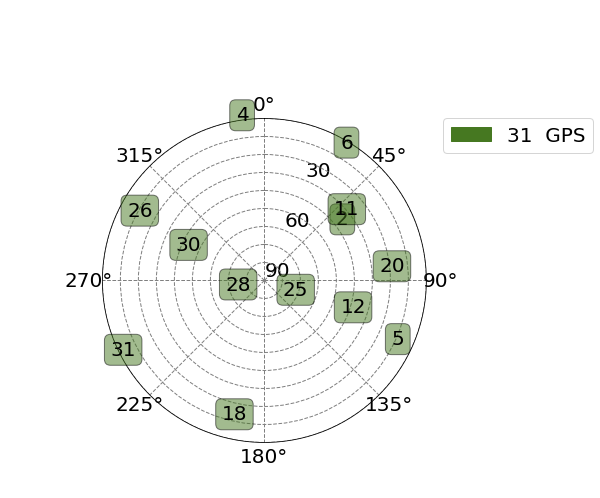

31


In [16]:
plot_1 = satellite_coordinate_azimuth_elevation_one_epoch (0)

plot_skyplot(plot_1)

In [17]:
def n_e_u_one_epoch (satellite):
    sat_rec_coordinate = sat_rec_vector(X,Y,Z,satellite)
    sat_rec_coordinate_all_epoch = np.matrix(sat_rec_coordinate[1:])
    sat_rec_coordinate_all_epoch = sat_rec_coordinate_all_epoch.T

    X_all_sat_rec_neu = np.matmul(Rneu_Transpose ,sat_rec_coordinate_all_epoch)
    res_X_all_sat_rec_neu = X_all_sat_rec_neu.T
    res_X_all_sat_rec_neu = np.array(res_X_all_sat_rec_neu)

    df_ECEF_neu_satellite_receiver = pd.DataFrame(res_X_all_sat_rec_neu, list(range(0,day_in_15_minutes,15)) ,['n','e','u'])
    
    result_azimuth_angle = []

    for i in range(len(df_ECEF_neu_satellite_receiver)):
        azimuth = np.arctan2(df_ECEF_neu_satellite_receiver.iloc[i][1], df_ECEF_neu_satellite_receiver.iloc[i][0])
        result_azimuth_angle.append(azimuth)

    array_azimuth_angle = np.array(result_azimuth_angle)
    array_azimuth_angle_degree = np.degrees(array_azimuth_angle)
    
    result_elevation_angle = []

    for i in range(len(df_ECEF_neu_satellite_receiver)):
        numerator = df_ECEF_neu_satellite_receiver.iloc[i][2]
        denominator = np.sqrt((df_ECEF_neu_satellite_receiver.iloc[i][0]**2)+
                              (df_ECEF_neu_satellite_receiver.iloc[i][1]**2)+
                              (df_ECEF_neu_satellite_receiver.iloc[i][2]**2))

        elevation_angle = np.arcsin(numerator/denominator)
        result_elevation_angle.append(elevation_angle)

    array_elevation_angle = np.array(result_elevation_angle)
    array_elevation_angle = np.rad2deg(array_elevation_angle)
    return(array_elevation_angle, array_azimuth_angle_degree)

n_e_u_one_epoch (0)

(array([-63.41574215, -67.75861962, -71.57570007, -74.51878247,
        -76.07383645, -75.82499468, -73.89427648, -70.81178782,
        -67.05863639, -62.92769512, -58.57789012, -54.0945947 ,
        -49.52419946, -44.89168703, -40.20955312, -35.48247848,
        -30.70987208, -25.88731178, -21.0073977 , -16.06029042,
        -11.03408642,  -5.91512316,  -0.68827594,   4.66270596,
         10.15478207,  15.80507985,  21.63018376,  27.64519888,
         33.86251761,  40.29017928,  46.92960143,  53.77210623,
         60.79240643,  67.93203019,  75.03808536,  81.50427876,
         83.79252686,  78.73283393,  71.60173096,  64.09221224,
         56.52833605,  49.02594306,  41.64634408,  34.42811456,
         27.39701431,  20.57058891,  13.96119819,   7.57847294,
          1.43150056,  -4.46914006, -10.10941348, -15.46986165,
        -20.52359177, -25.23424332, -29.55410961, -33.42285787,
        -36.76769428, -39.50625453, -41.55360979, -42.83391444,
        -43.29492853, -42.9207698 , -41.

In [18]:
def x_y_z (one_epoch):
    
    satellite_coordinate = satpos_alm(weeks,t,0)[1]
    
    array_elevation_one_epoch = n_e_u_one_epoch (one_epoch)[0]
    array_elevation_one_epoch = np.expand_dims(array_elevation_one_epoch,axis = 0).T
    
    
    array_azimuth_one_epoch = n_e_u_one_epoch (one_epoch)[1]
    array_azimuth_one_epoch = np.expand_dims(array_azimuth_one_epoch,axis = 0).T
    
    
    result = np.concatenate((array_elevation_one_epoch,array_azimuth_one_epoch,satellite_coordinate),axis =1)
    return result

x_y_z (0)

array([[-6.34157421e+01, -2.37889990e+01, -2.06262106e+07,
        -1.41776498e+07, -9.64999769e+06],
       [-6.77586196e+01, -2.92821374e+01, -1.94462369e+07,
        -1.39354701e+07, -1.21647814e+07],
       [-7.15757001e+01, -3.76505262e+01, -1.79933463e+07,
        -1.36935846e+07, -1.44766938e+07],
       [-7.45187825e+01, -5.02190177e+01, -1.62883949e+07,
        -1.34897415e+07, -1.65474312e+07],
       [-7.60738365e+01, -6.72975726e+01, -1.43598661e+07,
        -1.33578451e+07, -1.83426365e+07],
       [-7.58249947e+01, -8.58745789e+01, -1.22429610e+07,
        -1.33265981e+07, -1.98324069e+07],
       [-7.38942765e+01, -1.01203085e+02, -9.97845637e+06,
        -1.34183416e+07, -2.09917435e+07],
       [-7.08117878e+01, -1.11514704e+02, -7.61136680e+06,
        -1.36481328e+07, -2.18009389e+07],
       [-6.70586364e+01, -1.17701817e+02, -5.18945616e+06,
        -1.40230932e+07, -2.22458994e+07],
       [-6.29276951e+01, -1.21062791e+02, -2.76164828e+06,
        -1.45420502e+07

[ 1.12285222e+00  1.64648020e+00  2.35847180e+00  3.29869282e+00
  4.49713516e+00  5.93717836e+00  7.48830274e+00  8.84002751e+00
  9.55488358e+00  9.33395027e+00  8.27612550e+00  6.78676854e+00
  5.26533275e+00  3.93510231e+00  2.86433921e+00  2.04191828e+00
  1.43073971e+00  9.92604811e-01  6.96804395e-01  5.21866353e-01
  4.55132524e-01  4.92075067e-01  6.36043664e-01  8.98649778e-01
  1.30073902e+00  1.87351419e+00  2.65835721e+00  3.70134971e+00
  5.03321886e+00  6.61898597e+00  8.27033849e+00  9.58081778e+00
  1.00535054e+01  9.46818782e+00  8.09196387e+00  6.42698157e+00
  4.85734598e+00  3.55023539e+00  2.52974658e+00  1.76149748e+00
  1.19893846e+00  8.01157477e-01  5.37424203e-01  3.87037144e-01
  3.38084486e-01  3.86405308e-01  5.35132505e-01  7.94872467e-01
  1.18439816e+00  1.73141436e+00  2.47211643e+00  3.44623570e+00
  4.68023653e+00  6.14657537e+00  7.69310166e+00  8.98439238e+00
  9.58226004e+00  9.23203327e+00  8.08860447e+00  6.57465590e+00
  5.07030874e+00  3.77389

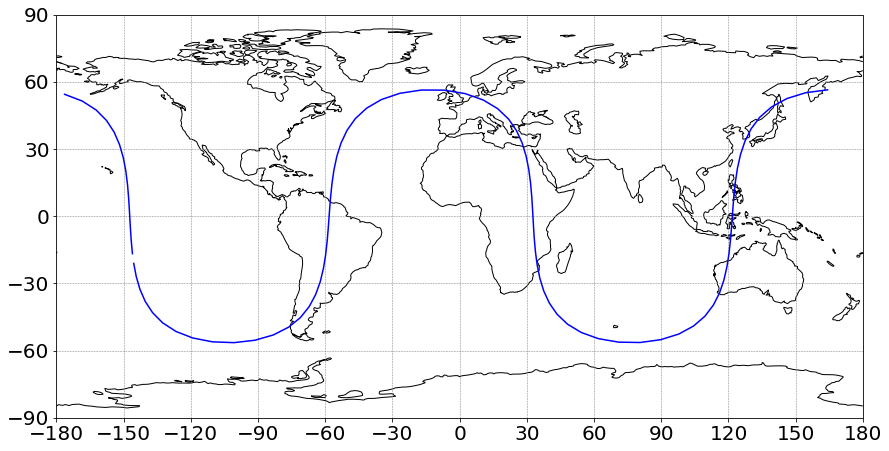

(array([[ -21.08434763, -145.49689092],
        [ -26.95233395, -144.3740387 ],
        [ -32.62896154, -142.7275585 ],
        [ -38.04024136, -140.36908671],
        [ -43.084232  , -137.07039388],
        [ -47.6202317 , -132.57325872],
        [ -51.45940086, -126.63608037],
        [ -54.36682236, -119.14777763],
        [ -56.09310295, -110.30775012],
        [ -56.44695628, -100.75286654],
        [ -55.37856364,  -91.41891627],
        [ -53.00437008,  -83.14279077],
        [ -49.54850032,  -76.35602222],
        [ -45.25738777,  -71.09068947],
        [ -40.3454277 ,  -67.15558716],
        [ -34.97901449,  -64.29124795],
        [ -29.28119032,  -62.24932967],
        [ -23.34216852,  -60.81858996],
        [ -17.22928824,  -59.82598515],
        [ -10.99477414,  -59.12918076],
        [  -4.68146743,  -58.6073144 ],
        [   1.67286987,  -58.15218188],
        [   8.03207252,  -57.66010681],
        [  14.35837686,  -57.02406315],
        [  20.60900616,  -56.12541337],


In [19]:
plot_2 = x_y_z (0)
groundtrack(plot_2)

In [20]:
dop = all_satellite_coordinate(total_minutes) [0]
gdop = dop.T[0]
pdop = dop.T[1]
tdop = dop.T[2]
hdop = dop.T[3]
vdop = dop.T[4]
PDOPneu = dop.T[5]

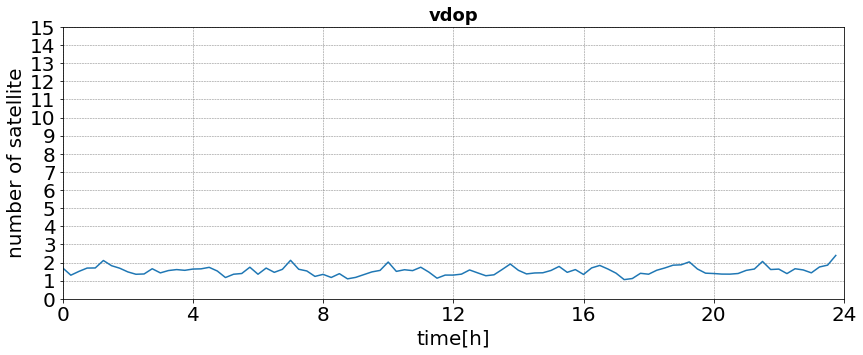

In [95]:
import matplotlib.pyplot as plt

def dop_plot():
    t = np.array(date2gpstime([2021,10,10,0,0,0])[1])/3600
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot()
    ax.plot(t,vdop)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xlim([0,24])
    ax.set_yticks(np.arange(0,16,1))
    ax.grid(True)
    ax.set_title ('vdop', fontdict = {'fontsize':18,'fontweight':'bold'})
    ax.set_xlabel('time[h]')
    ax.set_ylabel('number of satellite')
    
dop_plot()

In [22]:
def number_of_satellite_above_mask(one_epoch):
    res = []
    mask = 10
    one_epoch_every_satellite = []
    one_elevation_angle = []
    coordinate_receiver_x = coordinate_receiver[0]
    coordinate_receiver_y = coordinate_receiver[1]
    coordinate_receiver_z = coordinate_receiver[2]
    for i in range(len(nav)):
        satellite_coordinate_1 = satpos_alm(weeks,t,i)[1]
        one_epoch_every_satellite.append(satellite_coordinate_1[one_epoch])
    one_epoch_every_satellite = np.array(one_epoch_every_satellite)
    result_all_elevation = azimuth_elevation(total_sat)[1].T
    result_all_elevation = result_all_elevation[one_epoch]
    result_all_elevation = np.expand_dims(result_all_elevation,axis = 0)
    result_all_elevation = result_all_elevation.T
    one_epoch_cordinate_and_elevation = np.concatenate ((one_epoch_every_satellite,result_all_elevation),axis = 1)
    n = 0
    res_n = []
    
    for i in one_epoch_cordinate_and_elevation:
        n+=1
        if i[3] > mask:
            n+=1
            res_n.append(n)
    return np.array(res_n)
    
number_of_satellite_above_mask(0)

array([ 3, 13, 15, 24, 30, 32, 35, 38])

In [23]:
t = np.array(date2gpstime([2021,10,10,0,0,0])[1])
epoch_total = len(t)

def all_visible_satellite(total_epoch):
    res = []
    for i in range(total_epoch):
        result = number_of_satellite_above_mask(i)
        res.append(len(result))
    
    return res
all_visible_satellite(epoch_total)


[8,
 10,
 10,
 10,
 10,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 8,
 9,
 8,
 8,
 7,
 8,
 7,
 9,
 9,
 8,
 9,
 9,
 10,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 10,
 10,
 10,
 9,
 9,
 11,
 10,
 9,
 10,
 9,
 10,
 11,
 11,
 10,
 9,
 10,
 10,
 9,
 9,
 9,
 7,
 9,
 9,
 10,
 9,
 8,
 8,
 8,
 10,
 9,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 8,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 10,
 9,
 9,
 9,
 8,
 8,
 7]

In [24]:
visible_satellite = all_visible_satellite(epoch_total)

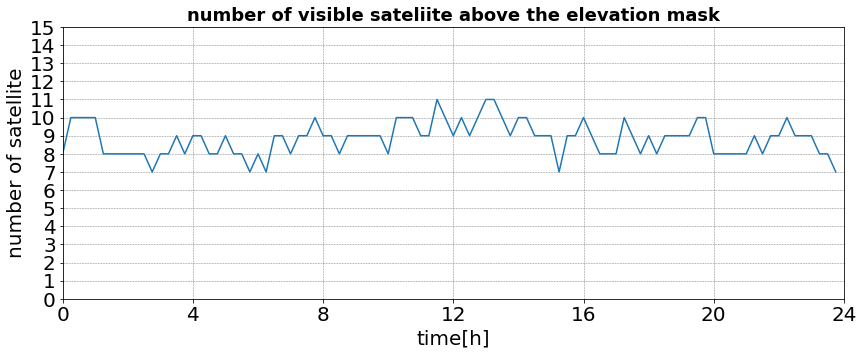

In [25]:
import matplotlib.pyplot as plt

def satellite_visible():
    t = np.array(date2gpstime([2021,10,10,0,0,0])[1])/3600
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot()
    ax.plot(t,visible_satellite)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xlim([0,24])
    ax.set_yticks(np.arange(0,16,1))
    ax.grid(True)
    ax.set_title ('number of visible sateliite above the elevation mask', fontdict = {'fontsize':18,'fontweight':'bold'})
    ax.set_xlabel('time[h]')
    ax.set_ylabel('number of satellite')
    
satellite_visible()

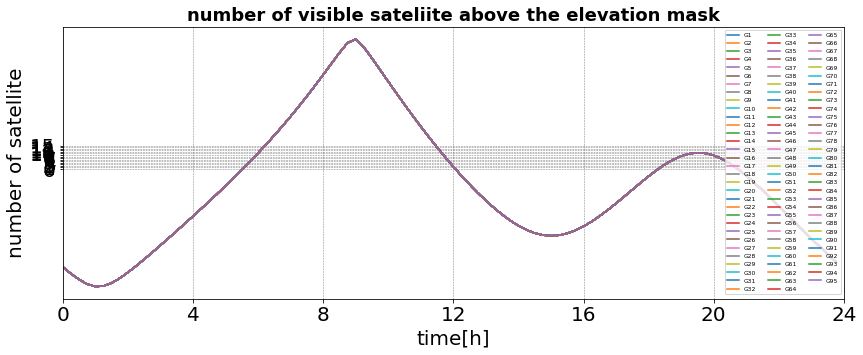

In [32]:
import matplotlib.pyplot as plt

total_time = len(t)

t = np.array(date2gpstime([2021,10,10,0,0,0])[1])/3600
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot()
legend = []

for i in range(1,total_time):
    ax.plot(t,res_elevation[0])

    legend.append('G'+str(i)) 
    
ax.set_xticks([0,4,8,12,16,20,24])
ax.set_xlim([0,24])
ax.set_yticks(np.arange(0,16,1))
ax.grid(True)
ax.set_title ('number of visible sateliite above the elevation mask', fontdict = {'fontsize':18,'fontweight':'bold'})
ax.set_xlabel('time[h]')
ax.set_ylabel('number of satellite')
ax.legend(legend,ncol=3,prop={'size': 6})

C:\Users\ASUS ROG\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


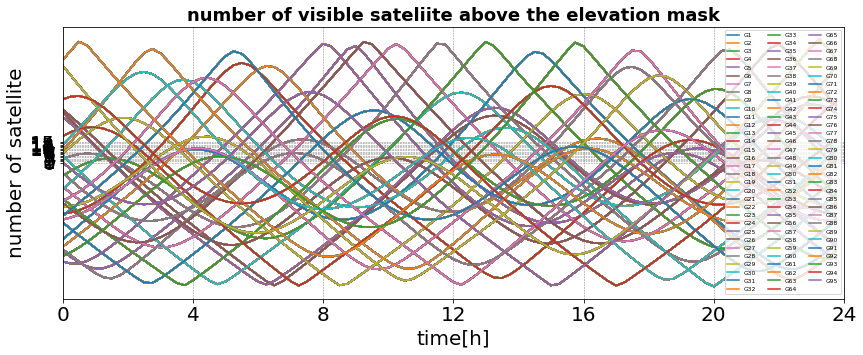

In [33]:
import matplotlib.pyplot as plt

total_time = len(t)

t = np.array(date2gpstime([2021,10,10,0,0,0])[1])/3600
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot()
legend = []

for i in range(1,total_time):
    legend.append('G'+str(i)) 
    for i in res_elevation:
        ax.plot(t,i)
        
ax.set_xticks([0,4,8,12,16,20,24])
ax.set_xlim([0,24])
ax.set_yticks(np.arange(0,16,1))
ax.grid(True)
ax.set_title ('number of visible sateliite above the elevation mask', fontdict = {'fontsize':18,'fontweight':'bold'})
ax.set_xlabel('time[h]')
ax.set_ylabel('number of satellite')
ax.legend(legend,ncol=3,prop={'size': 6})

In [26]:
res_elevation = azimuth_elevation(total_sat)[1]


In [27]:
res_elevation[0]

array([-63.41574215, -67.75861962, -71.57570007, -74.51878247,
       -76.07383645, -75.82499468, -73.89427648, -70.81178782,
       -67.05863639, -62.92769512, -58.57789012, -54.0945947 ,
       -49.52419946, -44.89168703, -40.20955312, -35.48247848,
       -30.70987208, -25.88731178, -21.0073977 , -16.06029042,
       -11.03408642,  -5.91512316,  -0.68827594,   4.66270596,
        10.15478207,  15.80507985,  21.63018376,  27.64519888,
        33.86251761,  40.29017928,  46.92960143,  53.77210623,
        60.79240643,  67.93203019,  75.03808536,  81.50427876,
        83.79252686,  78.73283393,  71.60173096,  64.09221224,
        56.52833605,  49.02594306,  41.64634408,  34.42811456,
        27.39701431,  20.57058891,  13.96119819,   7.57847294,
         1.43150056,  -4.46914006, -10.10941348, -15.46986165,
       -20.52359177, -25.23424332, -29.55410961, -33.42285787,
       -36.76769428, -39.50625453, -41.55360979, -42.83391444,
       -43.29492853, -42.9207698 , -41.73734117, -39.80

In [87]:
index_2 = np.array(list(range(len(nav))))+1
index_2 = index_2.tolist()
index_2
el = pd.DataFrame(res_elevation,index_1,t/60)
el = el.T
el

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0.0,-63.41574214739398,38.06986487411122,-17.23795637259430,2.61890953391823,6.77647895718187,5.36014200065222,-55.09138740348845,-60.40363193279784,-9.50401368051682,-36.64022178187014,...,-28.94110763048812,-27.49658810782849,-7.29610129735973,69.71007120554400,13.09669258507941,-38.31104931962256,73.63719945913947,-67.01758974102852,45.47409126712417,0.17126451495365
15.0,-67.75861962172404,33.25796584665459,-21.81854227682361,4.77216052688840,11.74624773649767,-0.26075569363268,-50.14525374468498,-55.93047737019392,-5.83627600251829,-35.77363460570256,...,-33.35864483758028,-24.49504968492943,-12.59361105933098,62.55606311444807,19.01516238176005,-33.59528557940467,80.66891918661113,-64.34340639547666,47.50556495884076,-4.63116195980643
30.0,-71.57570007317553,28.02729364911055,-26.51003843885818,6.11620330776955,16.58549872462008,-5.90922018050493,-45.11410362945087,-51.43974335607943,-2.66551278706005,-34.12787393828773,...,-37.69378277761606,-20.91525639319416,-17.60444097975793,55.46219105299155,25.09204055353806,-28.83241465013366,86.90479269901525,-60.90537326629583,47.89437035903292,-9.23882459664720
45.0,-74.51878247461575,22.55673177414075,-31.23801306415210,6.59117053103589,21.13333788318927,-11.53477281910317,-40.03187280073232,-46.92743202902574,-0.10205102064919,-31.75427250144233,...,-41.86701087301702,-16.81913041841901,-22.29756696640264,48.45488229545037,31.30229013453791,-24.01417647447641,84.23475706148716,-56.93821740762917,46.59420420179455,-13.57067680920895
60.0,-76.07383645310811,16.97212247479457,-35.93256978425575,6.18075340595259,25.19407642682449,-17.10320725828278,-34.92798474408647,-42.38619486548101,1.75183691960001,-28.72001288261314,...,-45.78770246527501,-12.26353522611239,-26.63263505515923,41.55539375111357,37.59765878102663,-19.13007693775744,77.56710310914816,-52.61117634155485,43.79072818157916,-17.54968433695515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365.0,-39.87704776956442,46.98385436851730,0.10845177044237,-15.40474741125185,-15.12163879293974,28.42886112676130,-74.71886883775331,-80.63344223104309,-30.52549859843609,-30.32912757704234,...,-9.23761689751162,-32.21163549661644,21.07334962096435,76.25520454028108,-12.63071185499292,-59.99688349529160,40.19812630169224,-63.77208252957938,22.57059684135521,22.28551328277457
1380.0,-45.07896768316053,47.77876343013552,-2.64839285875708,-10.83486710947947,-10.95870084300841,24.46795050257943,-71.61480056095367,-76.71669806305398,-25.82885947693188,-32.95613596207357,...,-13.00396647415945,-32.62026014284059,14.65461711845585,83.27518313419401,-7.47428368329945,-55.51134908756996,47.17619990371188,-66.57557569484244,28.37933189963149,18.09369102636921
1395.0,-50.19988898474421,46.97012419357500,-5.99672322666976,-6.57623456729892,-6.47300449198017,19.84009656426005,-67.69314515168995,-72.46002431009941,-21.19568467457652,-34.95530564407015,...,-17.06401843685661,-32.26086725149685,8.45132937707423,88.60402788591790,-2.17139460306600,-50.95691894205410,54.23910931944602,-68.42024256343245,33.89858822167958,13.49535436541307
1410.0,-55.20355110960962,44.68757539781665,-9.82018000434580,-2.72967273833332,-1.73803025359310,14.74990764048339,-63.29938909507745,-68.07870915885957,-16.70020382631652,-36.24551533322688,...,-21.32787956368848,-31.13798080627639,2.47334117902528,82.14469394379829,3.28915794580033,-46.35281879206003,61.35999099967664,-69.04137720506066,38.90973567057420,8.66440741047530


In [88]:
el.describe()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,...,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000
mean,-10.31366400885644,-11.52793901529356,-9.02012450339153,-9.28550076164356,-12.69258047961942,-12.23682356533456,-9.65200763906767,-11.34395423882636,-8.92619339052479,-10.89119648066721,...,-8.54842526802986,-11.99264801044150,-10.07536772989320,-9.09878697700053,-11.53645428287353,-10.45389898212909,-8.86778319104003,-9.27029913097577,-12.54339674577428,-12.28890854907053
std,40.65563493879625,37.41626955243675,40.40490843369555,40.49369323171510,37.61718241499868,37.88605617903237,40.28459355311765,39.38131398149724,40.36796982754390,39.56101292150489,...,40.43668849375558,38.50060872858732,39.84477557579183,40.63251504908890,38.57876567359877,40.26971939346220,40.92960710851738,40.44208002374166,37.64827331923465,37.62441110611134
min,-76.07383645310811,-88.11018398899107,-60.87107597138286,-70.95760941693285,-88.06649785081630,-87.35289812844761,-76.45852842968559,-83.50858915597584,-61.74469917783561,-82.78195370197446,...,-57.95575554723955,-87.71755033973804,-73.29929576230569,-66.04645951324622,-84.13143249148993,-77.91925666891420,-67.51297889946966,-69.04137720506066,-88.27338552524272,-88.11916066828887
25%,-39.96017410598350,-33.45663179661407,-42.83730378070538,-40.95873734956425,-35.95958381461561,-34.77481776820332,-39.06201082156745,-35.49609671352478,-43.22310695250357,-36.12282116365246,...,-42.80690574824627,-33.60436308133981,-39.34917340153773,-41.85891659248627,-33.29706494581591,-39.31703388274099,-42.82497130766985,-41.34751615432213,-35.88529750337324,-35.59408155551667
50%,-14.66679576381398,-10.95437840045360,-15.09197775404773,-14.98359346521200,-11.34446698444022,-12.30223455604814,-14.40587254112233,-13.82795166009624,-14.79476910411190,-13.10186798495345,...,-15.11120558378415,-12.65530815197919,-14.60530771145423,-14.80617924778415,-12.51535937997422,-13.92432729936932,-14.72821450412381,-14.73376237302850,-12.51422868368828,-11.58905932888428
75%,10.07427330267839,20.45883916780364,11.18138993953557,8.74272848084613,19.72889606635440,19.93020513041535,9.42797316751460,14.09369296056178,10.10572484014337,14.19220989874712,...,11.19278431536131,16.63140421605470,7.23083848059674,9.94666448805843,14.18080287875857,11.02330523312052,10.43779111933292,9.28609005991576,18.96602027833824,18.45872592830637
max,83.79252686461348,47.77876343013552,85.38961783121556,85.57745889124060,49.38074182528629,50.45306939559469,79.67743952634810,69.47010607612893,86.78429530517558,71.71921756404747,...,86.76776331917918,60.88528247901912,81.36100866525707,88.60402788591790,65.24949875156852,80.10283915366382,86.90479269901525,86.28852594420202,47.89437035903292,50.64969531057492


In [28]:
res_azimuth= azimuth_elevation(total_sat)[0]


In [29]:
res_azimuth[0]

array([ -23.78899903,  -29.28213744,  -37.65052621,  -50.21901769,
        -67.29757256,  -85.87457887, -101.20308462, -111.51470439,
       -117.70181672, -121.06279124, -122.5407111 , -122.73251682,
       -122.01105378, -120.6152564 , -118.70430517, -116.38898444,
       -113.75003012, -110.84914167, -107.73579002, -104.45155636,
       -101.03298685,  -97.51354576,  -93.9250333 ,  -90.29872411,
        -86.66644011,  -83.06178486,  -79.52184958,  -76.08990542,
        -72.82005551,  -69.7858924 ,  -67.09790081,  -64.94187897,
        -63.67485978,  -64.10871989,  -68.5788067 ,  -86.46231877,
       -144.95024979,  176.04958391,  165.7601062 ,  162.73880067,
        162.09884066,  162.42036818,  163.15126452,  164.02909007,
        164.90826434,  165.69627388,  166.32613887,  166.74290401,
        166.89619426,  166.73564747,  166.20788201,  165.25450879,
        163.81121975,  161.8084454 ,  159.17457418,  155.8432046 ,
        151.76600418,  146.93166613,  141.38811175,  135.25947

In [82]:
index_1 = np.array(list(range(len(nav))))+1
index_1 = index_1.tolist()
index_1
az = pd.DataFrame(res_azimuth,index_1,t/60)
az = az.T
az

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0.0,-23.78899902721760,56.47989090543489,-32.40425772071650,-8.13726129003040,117.05907411963537,32.59506202669187,12.62828539215432,-112.12128935456796,21.35878148580112,-145.12949341634288,...,-45.92430307822636,-173.97048540805585,163.43795632302016,121.00080142212107,-64.16293161261326,-113.08471969923882,-117.28509982035276,60.21701713573989,-71.01326747594092,-119.17319500428025
15.0,-29.28213743789600,52.19464104554570,-35.82949229128872,-13.30757507185409,112.73172238854960,31.70217252858577,10.74876298255768,-110.00290173523769,17.14242423770559,-151.10920764031090,...,-49.51358735820481,-178.41384084561182,162.57430389964995,125.20186022382202,-62.44536530874588,-110.38590530149563,-107.12873212670273,50.69611386519555,-80.36972759204170,-123.14204806721352
30.0,-37.65052620790997,49.25491792099299,-39.12663384569667,-18.81258586643618,107.98010131009947,31.42422358854763,9.26396442327509,-107.44600965796113,12.55781382472803,-156.71347702290942,...,-53.32501325253632,177.63049101207332,161.27509135496473,128.86293908029310,-61.21885241068555,-107.44673242172014,-65.85687242230340,43.29313806762678,-90.56737578349968,-127.11146065967255
45.0,-50.21901768812145,47.43135146396718,-42.40425026213838,-24.52713036122029,102.66509515136444,31.67875303309900,7.96717567576841,-104.58098513514796,7.61219089279995,-161.80985321842817,...,-57.50762498246804,174.14453464693520,159.47793307811818,132.17488574448046,-60.63068726201991,-104.31885959373739,39.39229070299302,37.62855339457742,-100.64577136786330,-131.18337819889533
60.0,-67.29757255668906,46.52120695691709,-45.78911322701791,-30.30506171472714,96.67173786305328,32.39952845378611,6.71153169881200,-101.49584772152470,2.35119453122299,-166.32190826522574,...,-62.22755627679249,171.08434637280166,157.11876436905351,135.20852970790642,-60.89507893253999,-101.04572786407763,57.11110589977235,33.23828572808112,-109.77336827983345,-135.44472825758109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365.0,-12.79750732385061,95.81481257059927,-12.18646613220210,10.27205884356210,135.71347346666411,48.42488611890036,43.26329096644723,-99.69542798334571,37.75511813706105,-117.02104923418243,...,-28.49070762281299,-148.07711360346943,163.33333818859600,-66.87042978415704,-76.35855616963877,-119.79918680343935,-137.57382644927389,111.95332468964496,-48.14886698763532,-96.70659454710616
1380.0,-14.29463693762945,85.91316783987779,-17.13086562573665,7.19693229034440,131.67270183478846,43.14614205426665,30.94316110479203,-109.68099642943785,34.54771069480486,-122.51758371174088,...,-32.50182829411703,-153.89593037496334,163.77612469365556,-57.50319083038848,-73.39093535841371,-119.64805246840993,-134.37731770251111,103.82314282608753,-50.31394126845762,-102.33155662559879
1395.0,-15.99095277228625,76.25809258006333,-21.69858211543218,3.71340377851293,127.77056783183629,38.98750575996748,22.96388645118559,-113.30551602234004,31.28641813673011,-128.34870270478592,...,-36.27039888137320,-159.65975626198846,164.04298839882199,48.48175105908741,-70.58763800891441,-118.62910496494301,-130.80784700227022,93.22258466404874,-53.70943511630263,-107.37632298017851
1410.0,-18.10530721419976,67.66420137060062,-25.89231533107038,-0.22356882153488,123.91310548814307,35.86869497044969,17.83295109176151,-114.04679964559921,27.87014857897378,-134.43540777791549,...,-39.86327643972171,-165.21730174676881,164.07889681138306,109.34077003990996,-67.99312974650296,-116.98135392148161,-126.73672320718191,80.89009855298276,-58.58994909120722,-111.95572384105729


In [83]:
az.describe()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,...,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000,96.00000000000000
mean,19.46255293455154,5.72191103641975,2.65566893148253,-16.42475456496274,-7.74168486930829,-7.56947773306996,-14.26384710137810,-17.25635157874226,-4.65165919087894,15.95380510658254,...,-0.51680673741097,14.46291657231839,18.53379559261432,10.43718436263911,-15.21627242955567,16.70275984039236,-10.91431073835433,-11.70088759816701,-6.23039338815049,8.87710232262242
std,104.00963273971173,100.76162234495520,99.03916257411629,102.42371029957604,101.42905085760708,101.77552197568247,105.09097295051860,103.40389288857311,99.27480413195462,104.28851721047891,...,99.18385561097824,101.51075501161144,104.25672737666495,100.16073695325038,102.44517410982023,105.47047470849311,100.00403922157275,102.82297487038036,101.44614790375697,101.06650253552928
min,-144.95024978615331,-175.46636752396429,-137.41513039101292,-174.31405165750715,-178.40288851528049,-179.05436069757212,-174.50142763065855,-179.09429596476687,-144.37529867597792,-178.60569638294604,...,-139.17764160305290,-178.41384084561182,-150.16418879767906,-130.06115419841473,-177.91964804195638,-175.27497246371792,-152.36475621940613,-155.89483141212727,-177.88466325202677,-177.79117250476008
25%,-76.94789145954269,-70.09479799033846,-95.01517510343936,-126.16299630811858,-88.89178570174907,-89.34733966595601,-109.82765691246341,-100.14553291789045,-107.11098004649465,-65.78755451259286,...,-100.00475962159751,-55.32929359690276,-81.72539988212586,-86.73417638669446,-96.21002492668424,-80.75010182179804,-115.42314105984322,-121.29257704356871,-87.79814586573760,-64.44954756993027
50%,0.62851645061720,6.20549358404666,1.48555507798297,-2.42868320374859,-7.74854412472871,-7.21950569617880,1.14609180592101,-3.34462509259464,-0.39484586398191,0.98713977674768,...,-1.47617445206490,0.34173131071515,2.02921559862663,2.54074179453354,0.27987641310943,-0.30413910113312,-1.06757298448852,2.17296035815431,-6.57233770741355,9.07630899920467
75%,123.75482868670093,86.28865359110095,102.86825811235859,81.79520916646177,67.47503163531434,70.04614765991504,80.42980759622006,61.41332339708397,91.83643188061605,99.84802360519494,...,99.37544396325285,96.82675093422091,124.66681475192213,117.47834285105435,61.30208113951417,114.62884756041325,84.11074238457880,86.71994523537961,69.97826443974726,91.38155800579011
max,176.04958390818209,178.73068810001388,142.91922902094097,125.10499018105091,176.33412814580828,175.38022106971889,179.32861552492500,178.57974225172399,134.67927630684136,179.51606854841759,...,138.28380514774258,177.63049101207332,178.94041218175954,150.43027995143814,179.33035209264156,176.57762028451265,131.04382249605248,170.58876836768036,176.75381669379829,177.00563266641316
